Graphs for Fig 4, model panels

Test noise: 1, 2, 4, 8, 16, 32, 64...

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from skmisc.loess import loess
from scipy.signal import find_peaks
import warnings

%matplotlib inline
warnings.simplefilter(action='ignore')

#path_single = '../out_batch/batch_2023-04-28_08-49-52__MANUSCRIPT_DUALv4_single/'
#path_multi = '../out_batch/batch_2023-04-27_14-12-06__MANUSCRIPT_DUALv4_multi/'

path_single = '../out_batch/batch_2023-04-26_13-33-24__MANUSCRIPT_UTGeffv1_single/'
path_multi = '../out_batch/batch_2023-04-25_22-52-42__MANUSCRIPT_UTGeffv1_multi/'

s = 'f'

noise_levels = ['12.5', '15', '17.5', '20']

data_single_raw_s1 = pd.read_csv(path_single + 'auxin_profile_0_f.csv')

data_multi_raw_s1 = pd.read_csv(path_multi + 'auxin_profile_multiple_12.5_' + s + '.csv')
data_multi_raw_s2 = pd.read_csv(path_multi + 'auxin_profile_multiple_15_' + s + '.csv')
data_multi_raw_s3 = pd.read_csv(path_multi + 'auxin_profile_multiple_17.5_' + s + '.csv')
data_multi_raw_s4 = pd.read_csv(path_multi + 'auxin_profile_multiple_20_' + s + '.csv')
# Select first 13 rows only
data_single_raw_s1, data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3, data_multi_raw_s4 = [i.head(13) for i in [data_single_raw_s1, data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3, data_multi_raw_s4]]

# Give x values (cell row) to all datasets
data_x = np.linspace(1, len(data_single_raw_s1.index), len(data_single_raw_s1.index))
data_single_raw_s1['x'], data_multi_raw_s1['x'], data_multi_raw_s2['x'], data_multi_raw_s3['x'], data_multi_raw_s4['x'] = data_x, data_x, data_x, data_x, data_x

all_single_samples = [data_single_raw_s1]

all_multi_samples = [data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3, data_multi_raw_s4]

# Calculate mean and median of profiles replicates
all_means = [i.drop(columns=['x']).mean(axis=1) for i in all_multi_samples]
all_medians = [i.drop(columns=['x']).median(axis=1) for i in all_multi_samples]

In [11]:
data_single_raw_s1

,0,x
0,213.644435,1.0
1,244.083189,2.0
2,146.975317,3.0
3,99.121076,4.0
4,72.874305,5.0
5,57.341134,6.0
6,48.485185,7.0
7,43.972673,8.0
8,41.941701,9.0
9,41.053434,10.0


In [12]:
data_multi_raw_s1

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,x
0,119.325131,120.990104,191.284398,171.235503,148.998300,202.387172,185.675977,172.604561,205.742275,280.631193,...,151.728779,202.830599,168.008338,209.356637,166.168275,160.747074,139.149224,172.381811,162.801126,1.0
1,242.777553,231.450657,216.218238,227.133811,256.625511,222.736034,265.756560,255.245889,248.798715,225.528654,...,224.317268,259.820642,245.733880,235.681016,266.345057,237.563142,219.991787,247.071159,247.105448,2.0
2,163.881312,186.221328,148.049266,83.178043,180.695035,116.150225,104.978080,221.696895,120.510384,173.815003,...,137.011093,126.135439,137.959981,170.794477,106.404200,123.620146,152.828415,146.167123,153.768689,3.0
3,86.421580,149.268420,78.486863,79.772419,85.965261,140.589292,70.971635,145.081030,117.150546,105.328126,...,97.736568,116.441321,89.712734,107.110376,77.720432,75.471101,123.174370,132.000265,80.739046,4.0
4,55.319014,79.509436,48.291212,62.312549,68.452977,99.862475,76.119403,91.252971,75.137531,111.414705,...,71.362714,79.938758,67.291243,57.746773,66.902383,53.541930,75.133600,89.412308,69.901829,5.0
5,48.632640,79.625072,53.824361,47.889810,62.936323,65.600989,44.810887,56.050118,69.933936,54.164319,...,62.217178,56.039785,46.310896,62.698063,45.642450,47.189701,75.179671,74.099330,48.370152,6.0
6,39.342810,76.386445,57.177610,43.680508,56.776803,43.903915,39.439266,43.133050,43.055762,53.373298,...,44.532432,37.476158,43.043909,68.131801,46.778594,48.576965,50.055467,69.363661,64.814717,7.0
7,33.295220,88.124846,50.356940,40.144809,51.187665,34.488966,45.704118,33.426074,43.500595,46.256091,...,55.910004,43.199725,48.618407,51.620320,51.969264,33.873859,37.572353,46.202138,46.651590,8.0
8,38.741447,78.514179,40.259390,37.689164,66.626193,41.782119,34.380506,35.322641,28.913488,39.215400,...,58.192644,40.960725,61.041415,64.047079,45.917001,48.485205,30.711169,55.981934,36.669704,9.0
9,39.935162,50.762454,40.000924,37.939550,44.673517,44.043193,44.613330,32.491154,28.621952,32.342072,...,32.835518,38.302164,40.307555,42.461847,43.152091,44.967989,38.550489,85.777919,29.814172,10.0


In [13]:
# Make figure 2 (individual plots)

def make_individual_plot(sample1_single=None, sample2_single=None, sample_multi1=None, sample_multi2=None, mean=None, x=data_x, loess=None):

    fig2, ax1 = plt.subplots(1,1, figsize=(2.5,4))

    ax1.plot(sample1_single['0'], sample1_single['x'], color='blue')
    ax1.plot(sample2_single['0'], sample2_single['x'], color='red')

    #for col in sample_multi.drop(columns=['x']):
        #ax1.plot(sample_multi[col], sample_multi['x'], color='blue', alpha=.15)

    #ax1.fill_betweenx(loess['x'], loess['ymin'], loess['ymax'], alpha=.2, color='blue', linewidth=0)

    #ax1.plot(mean, data_x, color='blue')

    ax1.set_xlim(-10,350) 
    ax1.set_yticks([1,4,7,10,13])
    ax1.invert_yaxis()
    plt.xlabel('[Auxin] (A.U.)')
    plt.ylabel('Cell row')
    #fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_comapre.png', bbox_inches='tight')
    #fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_compare.svg', bbox_inches='tight')

    plt.show()

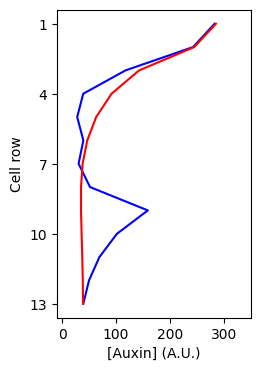

In [14]:
wt = pd.read_csv('../out_batch/batch_2023-04-28_08-49-52__MANUSCRIPT_DUALv4_single/auxin_profile_0_a.csv').head(13)
wt['x'] = data_x
cuc = pd.read_csv('../out_batch/batch_2023-04-28_08-49-52__MANUSCRIPT_DUALv4_single/auxin_profile_0_b.csv').head(13)
wt['x'], cuc['x'] = data_x, data_x

make_individual_plot(sample1_single=wt, sample2_single=cuc)

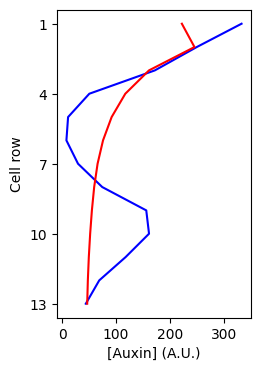

In [15]:
wt = pd.read_csv('../out_batch/batch_2023-04-26_13-33-24__MANUSCRIPT_UTGeffv1_single/auxin_profile_0_a.csv').head(13)
wt['x'] = data_x
cuc = pd.read_csv('../out_batch/batch_2023-04-26_13-33-24__MANUSCRIPT_UTGeffv1_single/auxin_profile_0_c.csv').head(13)
wt['x'], cuc['x'] = data_x, data_x

make_individual_plot(sample1_single=wt, sample2_single=cuc)

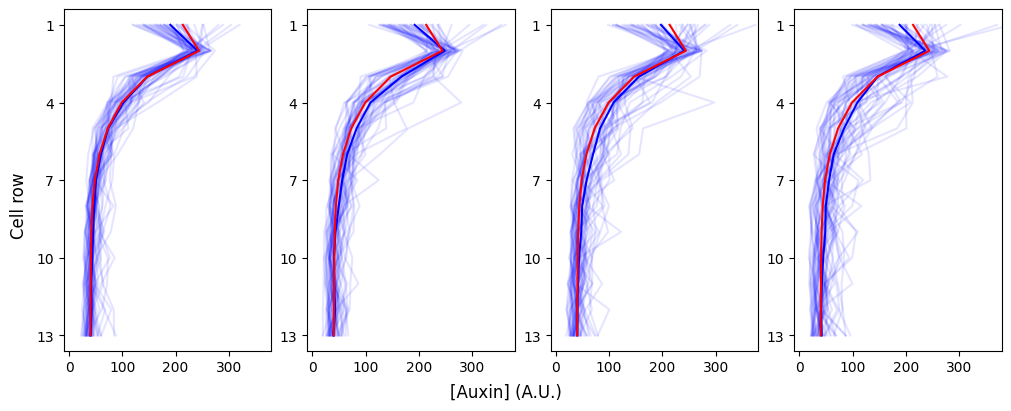

In [16]:
# Individual composite plot

fig3, axes = plt.subplots(1,4, figsize=(10,4), constrained_layout=True)
for data, ax in zip(all_multi_samples, axes.ravel()):
    for col in data.drop(columns=['x']):
        ax.plot(data[col], data['x'], color='blue', alpha=.1)
for mean, ax in zip(all_means, axes.ravel()):
    ax.plot(mean, data_x, color='blue')
for ax in axes.ravel():
    ax.plot(all_single_samples[0]['0'], data_x, color='red')
for ax in axes.ravel():    
    ax.set_yticks([1,4,7,10,13])
    ax.invert_yaxis()
    ax.set_xlim(-10,380)   
fig3.supxlabel('[Auxin] (A.U.)')
fig3.supylabel('Cell row')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_comapre.png', bbox_inches='tight')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_compare.svg', bbox_inches='tight')

plt.show()

In [17]:
# Characterize peaks

# Iterate over samples and replicates and extract metrics from the auxin site(s) that form(s) on the margin           
all_peaks = pd.DataFrame(columns=['sample', 'replica', 'pos', 'amplitude'])

for sample_id, sample in enumerate(all_multi_samples):
    for replica in sample.drop(columns=['x']):

        # Find pos a value of cell row with lowest auxin
        min_val = sample[replica].min()
        
        peaks = list(find_peaks(sample[replica], height = 1, threshold = 1, distance = 1))
        if len(peaks[0]) == 0:
            pass
        if len(peaks[0]) == 1:
            peak_position = data_single_raw_s1['x'][peaks[0][0]] #peak_pos = sample['x'][peaks[0][0]]
            peak_height = peaks[1]['peak_heights'][0]
            all_peaks = all_peaks.append(pd.DataFrame({'sample': sample_id, 'replica': replica, 'pos': float(peak_position), 'amplitude': peak_height - min_val}, index=[0]), ignore_index=True)
        if len(peaks[0]) > 1:
            # Select peak with highest amplitude, excluding the peak that represents the tip of the leaf (cell row)
            # If distal auxin site (rows 0, 1, 2, 3) is detected as peak, remove it from the list of peaks. 
            if peaks[0][0] < 4:
                peaks[0] = np.delete(peaks[0], 0)
                peaks[1]['peak_heights'] = np.delete(peaks[1]['peak_heights'], 0)
            # Select highest peak
            max_height_value = np.amax(peaks[1]['peak_heights'])
            max_height_index = np.argmax(peaks[1]['peak_heights'])
            position = peaks[0][max_height_index]+1
            all_peaks = all_peaks.append(pd.DataFrame({'sample': sample_id, 'replica': replica, 'pos': float(position), 'amplitude': max_height_value - min_val}, index=[0]), ignore_index=True)
        
        troughs = list(find_peaks(-sample[replica], height = 1, threshold = 1, distance = 1))

#all_peaks['pos'] = all_peaks['pos'].astype(int)
all_peaks[all_peaks['sample'] == 0]

,sample,replica,pos,amplitude
0,0,0,10.0,15.580801
1,0,1,8.0,48.290447
2,0,2,7.0,19.784084
3,0,3,2.0,189.827019
4,0,4,9.0,27.070081
5,0,5,4.0,106.100325
6,0,6,5.0,47.181900
7,0,7,12.0,25.013864
8,0,8,11.0,6.597710
9,0,9,5.0,84.189931


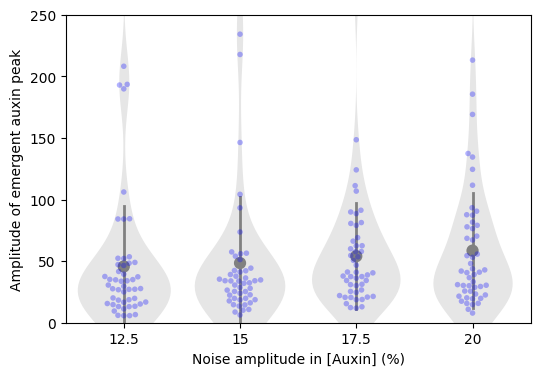

In [18]:
# Graph amplitude of peaks

all_peaks_wt = all_peaks[all_peaks['sample'] < 4]

fig4, ax = plt.subplots(1,1, figsize=(6,4))
ax.set_ylim(0, 250)
sns.violinplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.amplitude, alpha=0.3, size=3, linewidth=0, color=(.9, .9, .9))
sns.pointplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.amplitude, ci='sd', linewidth=0, capsize=0, join=False, color='gray', scale=1, errwidth=2)
sns.swarmplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.amplitude, alpha=0.3, color='blue', size=4)
ax.set_ylabel('Amplitude of emergent auxin peak')
ax.set_xlabel('Noise amplitude in [Auxin] (%)')
ax.set_xticklabels(noise_levels)
plt.show()

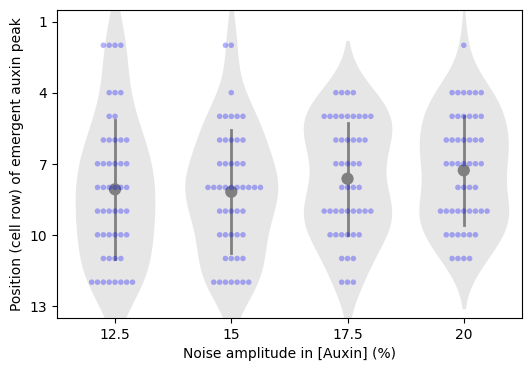

In [19]:
# Graph position of peaks

fig5, ax = plt.subplots(1,1, figsize=(6,4))
ax.set_ylim(.5, 13.5)
ax.invert_yaxis()
ax.set_yticks([1,4,7,10,13])
sns.violinplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.pos, alpha=0.25, size=3, linewidth=0, color=(.9, .9, .9))
sns.pointplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.pos, ci='sd', capsize=0, join=False, color='gray', scale=1, errwidth=2)
sns.swarmplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.pos, alpha=0.3, color='blue', size=4)
ax.set_ylabel('Position (cell row) of emergent auxin peak')
ax.set_xlabel('Noise amplitude in [Auxin] (%)')
ax.set_xticklabels(noise_levels)
plt.show()